# LAPTOP PRICE PREDICTION USING MACHINE LEARNING

This notebook aims to predict laptop prices using machine learning regression models.
The workflow includes data preprocessing, feature engineering, model training, evaluation, and comparison of multiple algorithms.

## IMPORTING REQUIRED LIBRARIES FOR OPERATIONS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET LOADING

In [2]:
df = pd.read_csv('huggingface_laptop_dataset.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
28,29,Dell,Latitude 5590,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8GB,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,1298.00
1239,1257,Lenovo,ThinkPad 13,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.4kg,1499.00
425,432,Dell,Inspiron 7577,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62kg,1159.00
1074,1089,Lenovo,ThinkPad Yoga,Ultrabook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1713.49
703,711,Lenovo,V310-15IKB (i5-7200U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.1kg,621.45


# EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
df.shape

(1303, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
df.size

16939

In [10]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [11]:
df.drop(columns='laptop_ID', inplace=True)

In [12]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Converting Text Data of RAM and Weight to Numerical Format for further operations

In [13]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [14]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float64')

In [15]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


C:\Users\lamab\AppData\Local\Temp\ipykernel_24416\2073861339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

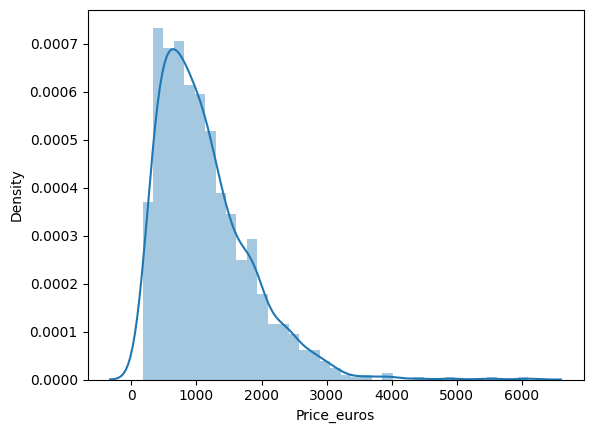

In [17]:
sns.distplot(df['Price_euros'])

## PRICE CONVERSION (Euro --> NPR)

In [18]:
Euro_to_NPR = 169.02

In [19]:
df['Price_NPR'] = (df['Price_euros'] * Euro_to_NPR).round(2)

In [20]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_NPR
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,226434.40
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,151938.84
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,97186.50
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,428879.80
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,304844.47


In [21]:
df.drop(columns='Price_euros', inplace=True)

C:\Users\lamab\AppData\Local\Temp\ipykernel_24416\4020296647.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_NPR'])


<Axes: xlabel='Price_NPR', ylabel='Density'>

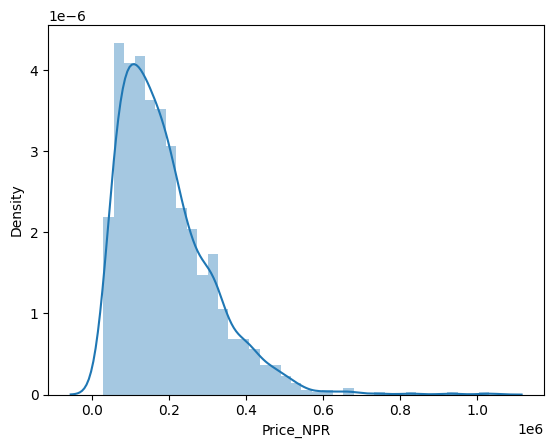

In [22]:
sns.distplot(df['Price_NPR'])

In [23]:
df['Price_NPR'].describe()


count    1.303000e+03
mean     1.899256e+05
std      1.181465e+05
min      2.940948e+04
25%      1.012430e+05
50%      1.651325e+05
75%      2.514815e+05
max      1.030853e+06
Name: Price_NPR, dtype: float64

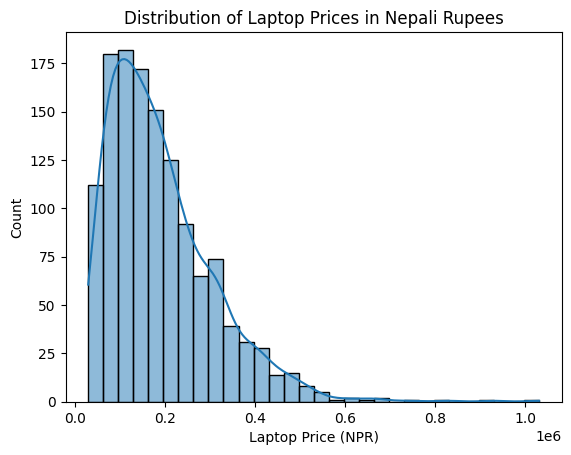

In [24]:
sns.histplot(df['Price_NPR'], bins=30, kde=True)
plt.xlabel("Laptop Price (NPR)")
plt.title("Distribution of Laptop Prices in Nepali Rupees")
plt.show()


<Axes: xlabel='Company'>

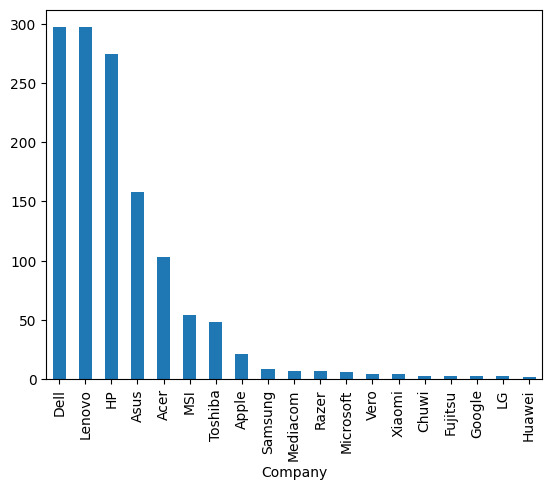

In [25]:
df['Company'].value_counts().plot(kind='bar')

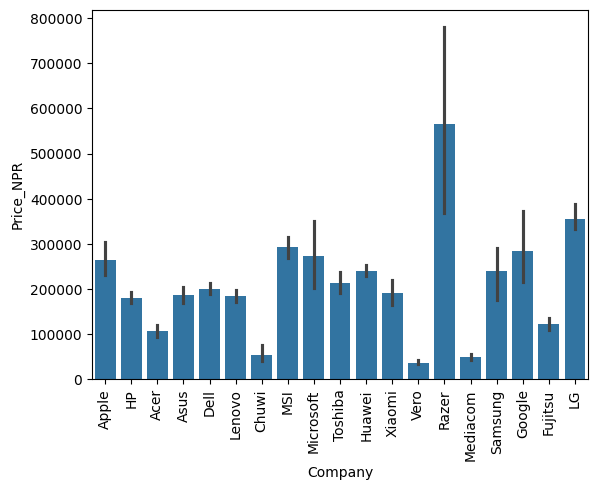

In [26]:
sns.barplot(x=df['Company'], y=df['Price_NPR'])
plt.xticks(rotation='vertical')
plt.show()


<Axes: xlabel='TypeName'>

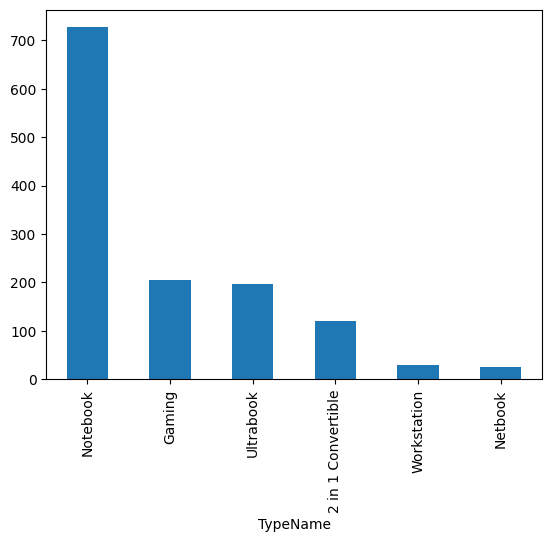

In [27]:
df['TypeName'].value_counts().plot(kind='bar')

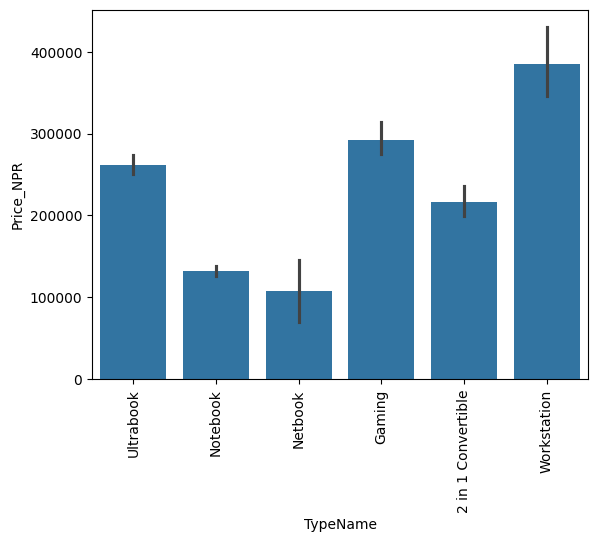

In [28]:
sns.barplot(x=df['TypeName'],y=df['Price_NPR'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\lamab\AppData\Local\Temp\ipykernel_24416\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

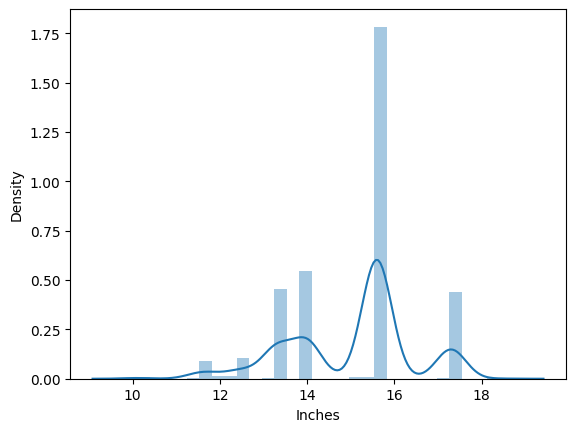

In [29]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price_NPR'>

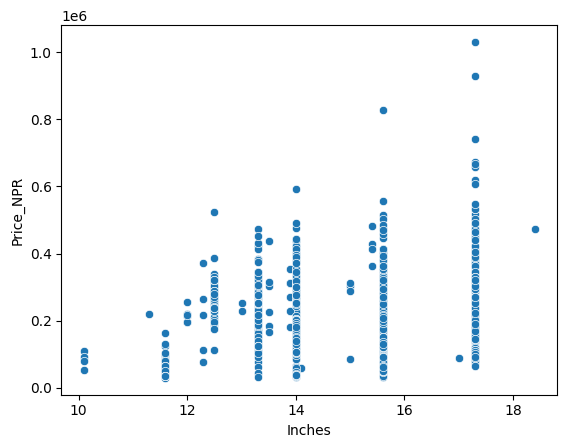

In [30]:
sns.scatterplot(x=df['Inches'],y=df['Price_NPR'])

In [31]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [32]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [33]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0


In [34]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen
1074,Lenovo,ThinkPad Yoga,Ultrabook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,289614.08,1
1120,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,33127.92,0
348,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,63382.50,1
66,HP,250 G6,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,AMD Radeon 520,Windows 10,1.86,74147.38,0
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,62368.38,0


<Axes: xlabel='Touchscreen'>

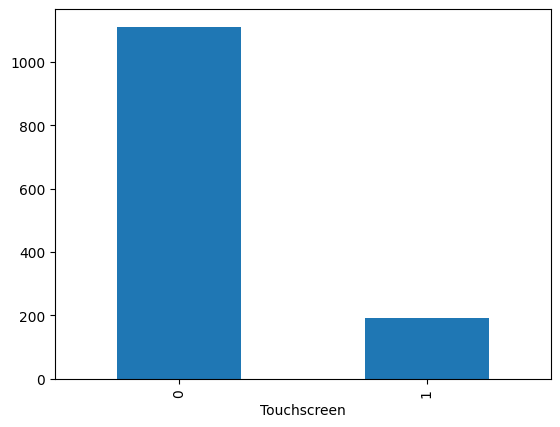

In [35]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price_NPR'>

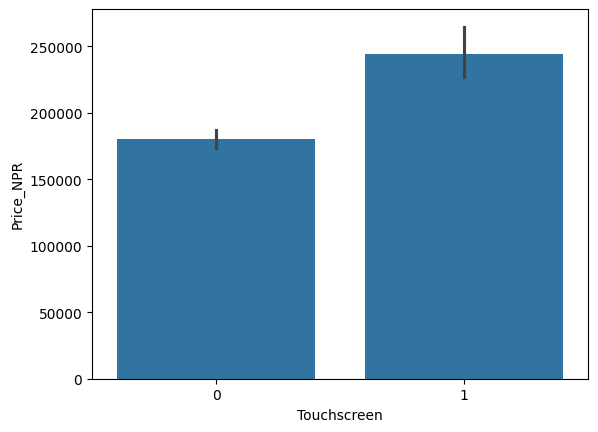

In [36]:
sns.barplot(x=df['Touchscreen'],y=df['Price_NPR'])

In [37]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [38]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips
1259,MSI,GE62 Apache,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,207725.58,0,0
393,MSI,Leopard GP72M,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,228007.98,0,0
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,1030852.98,1,0
1060,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,180851.40,0,0
171,HP,17-bs001nv (i5-7200U/6GB/2TB/Radeon,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,2TB HDD,AMD Radeon 520,Windows 10,2.71,118144.98,0,1


<Axes: xlabel='Ips'>

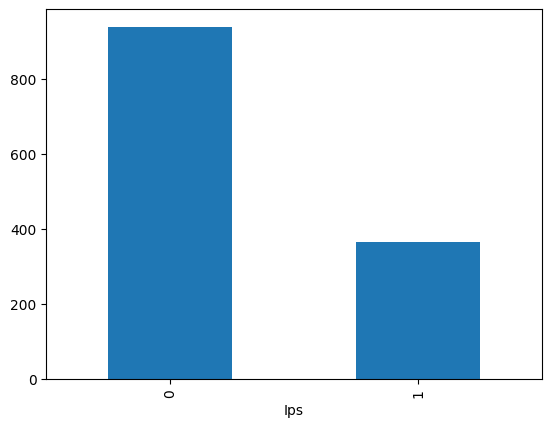

In [39]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price_NPR'>

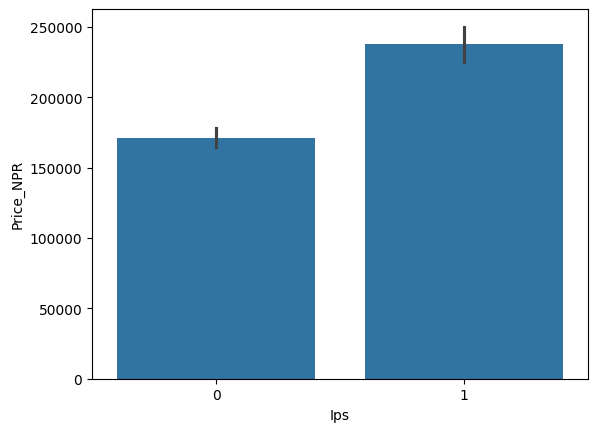

In [40]:
sns.barplot(x=df['Ips'],y=df['Price_NPR'])

In [41]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [42]:
new_screenresolution=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [43]:
new_screenresolution.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [44]:
df['X_resolution']=new_screenresolution[0]

In [45]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,X_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,IPS Panel Retina Display 2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,Full HD 1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,IPS Panel Retina Display 2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,IPS Panel Retina Display 2560


In [46]:
df['Y_resolution']=new_screenresolution[1]

In [47]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,X_resolution,Y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,IPS Panel Retina Display 2560,1600


In [48]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,X_resolution,Y_resolution
212,HP,15-bs018nq (i3-6006U/4GB/500GB/FHD/No,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,58987.98,0,0,Full HD 1920,1080
31,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,33634.98,0,0,1366,768
484,Lenovo,ThinkPad E570,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,95496.30,0,0,1366,768
39,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.10,148568.58,0,0,Full HD 1920,1080
616,Dell,Vostro 3568,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,AMD Radeon R5 M420,Linux,2.18,96172.38,0,0,Full HD 1920,1080


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_NPR         1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_resolution      1303 non-null   object 
 15  Y_resolution      1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(

In [50]:
df['X_resolution'] = df['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [51]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,X_resolution,Y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,2560,1600


In [52]:
df['X_resolution']=df['X_resolution'].astype('int32')
df['Y_resolution']=df['Y_resolution'].astype('int32')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_NPR         1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_resolution      1303 non-null   int32  
 15  Y_resolution      1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(

In [54]:
df.corr(numeric_only=True)['Price_NPR']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price_NPR       1.000000
Touchscreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price_NPR, dtype: float64

In [55]:
df['Pixels_Per_Inch(PPI)'] = (((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5 / df['Inches']).astype('float')

In [56]:
df.corr(numeric_only=True)['Price_NPR']

Inches                  0.068197
Ram                     0.743007
Weight                  0.210370
Price_NPR               1.000000
Touchscreen             0.191226
Ips                     0.252208
X_resolution            0.556529
Y_resolution            0.552809
Pixels_Per_Inch(PPI)    0.473487
Name: Price_NPR, dtype: float64

In [57]:
df.drop(columns=['ScreenResolution','Inches','X_resolution','Y_resolution'], inplace=True)

In [58]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI)
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,226.983005


In [59]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [60]:
df['Cpu_Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [61]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5


In [62]:
df['Cpu_Name'].value_counts()

Cpu_Name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
AMD A6-Series A6-9220         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD E-Series 6110             1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD FX 9830P                  1

In [63]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [64]:
df['Cpu_brand'] = df['Cpu_Name'].apply(fetch_processor)

In [65]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_Name,Cpu_brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5,Intel Core i5


In [66]:
df['Cpu_brand'].value_counts()

Cpu_brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='Cpu_brand'>

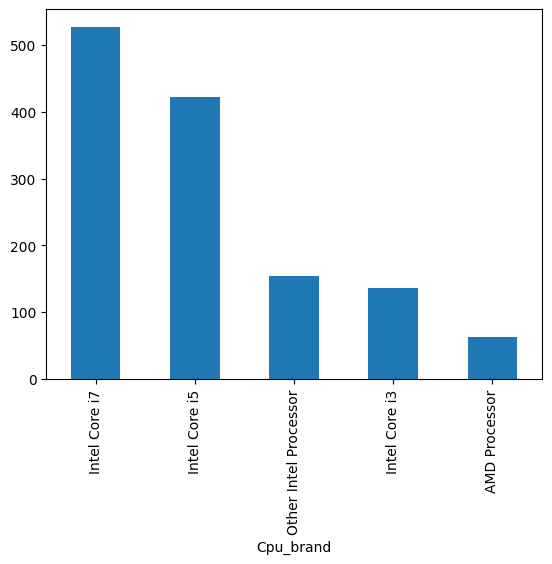

In [67]:
df['Cpu_brand'].value_counts().plot(kind='bar')

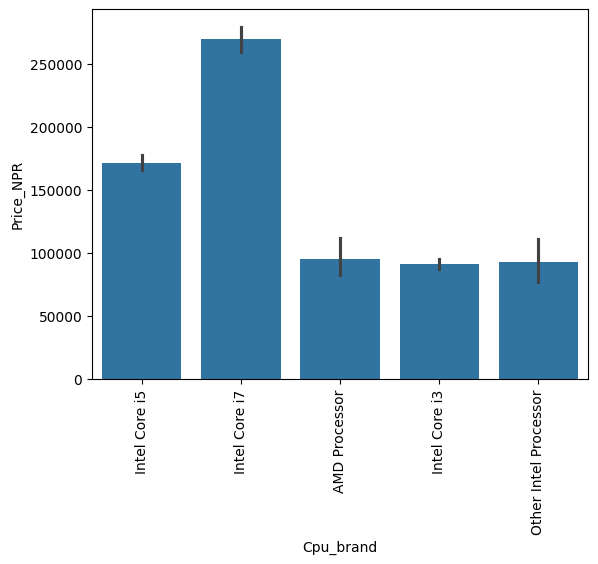

In [68]:
sns.barplot(x=df['Cpu_brand'],y=df['Price_NPR'])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_Name,Cpu_brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5,Intel Core i5


In [70]:
df.drop(columns=['Cpu','Cpu_Name'], inplace=True)

In [71]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5


In [72]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [73]:
# Fix 1: use raw string for regex
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)

df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("0").str.strip()   # Fix 2: avoid inplace chaining

# Layer 1 flags
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash" in x else 0)

# Fix 3: SAFE numeric extraction (instead of str.replace + astype)
df["first"] = (
    df["first"]
    .str.extract(r'(\d+)', expand=False)
    .fillna(0)
    .astype(int)
)

# Layer 2 flags
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash" in x else 0)

# Fix 4: SAFE numeric extraction for second
df["second"] = (
    df["second"]
    .str.extract(r'(\d+)', expand=False)
    .fillna(0)
    .astype(int)
)

# Final storage columns
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]

# Cleanup
df.drop(columns=[
    'Memory',
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


In [74]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5,0,256,0,0


In [75]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [76]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [77]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [78]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [79]:
df = df[df['Gpu_brand'] != 'ARM']

In [80]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

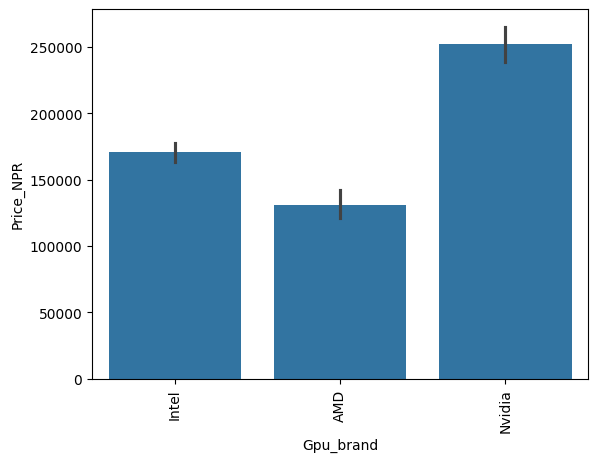

In [81]:
sns.barplot(x=df['Gpu_brand'],y=df['Price_NPR'])
plt.xticks(rotation='vertical')
plt.show()

In [82]:
df.drop(columns=['Gpu'],inplace=True)

In [83]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [84]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [85]:
def clean_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [86]:
df['os'] = df['OpSys'].apply(clean_os)

In [87]:
df['os'].value_counts()

os
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64

In [88]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_NPR,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,226434.40,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,151938.84,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,250 G6,Notebook,8,No OS,1.86,97186.50,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,428879.80,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,304844.47,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [89]:
df.drop(columns='OpSys', inplace=True)

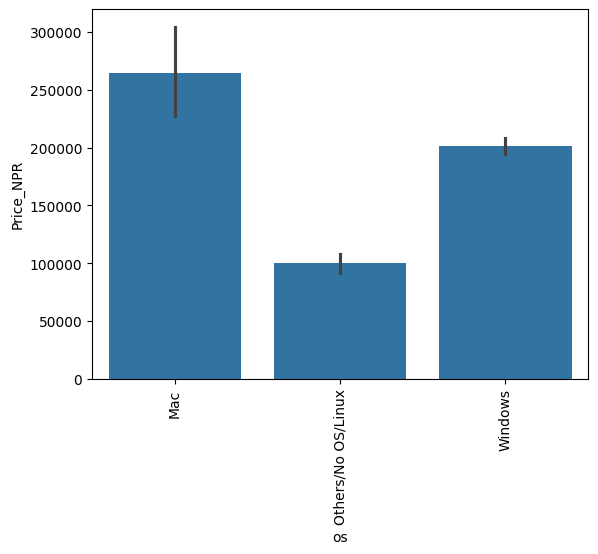

In [90]:
sns.barplot(x=df['os'],y=df['Price_NPR'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\lamab\AppData\Local\Temp\ipykernel_24416\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

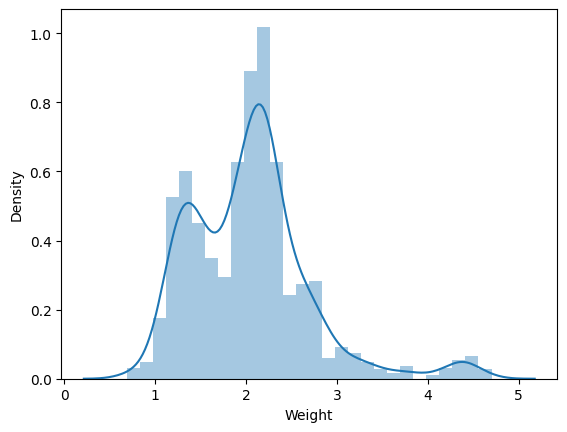

In [91]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_NPR'>

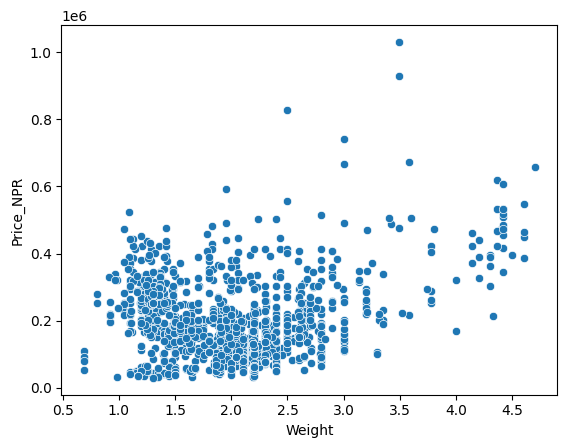

In [92]:
sns.scatterplot(x=df['Weight'], y=df['Price_NPR'])

In [93]:
df.corr(numeric_only=True)['Price_NPR']

Ram                     0.742905
Weight                  0.209867
Price_NPR               1.000000
Touchscreen             0.192917
Ips                     0.253320
Pixels_Per_Inch(PPI)    0.475368
HDD                    -0.096891
SSD                     0.670660
Hybrid                  0.007942
Flash_Storage          -0.040067
Name: Price_NPR, dtype: float64

<Axes: xlabel='Ram'>

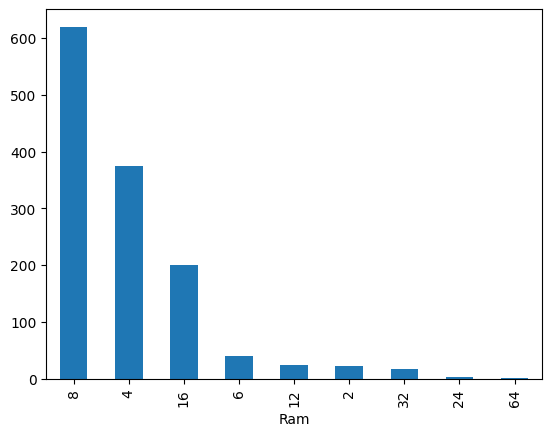

In [94]:
df['Ram'].value_counts().plot(kind='bar')

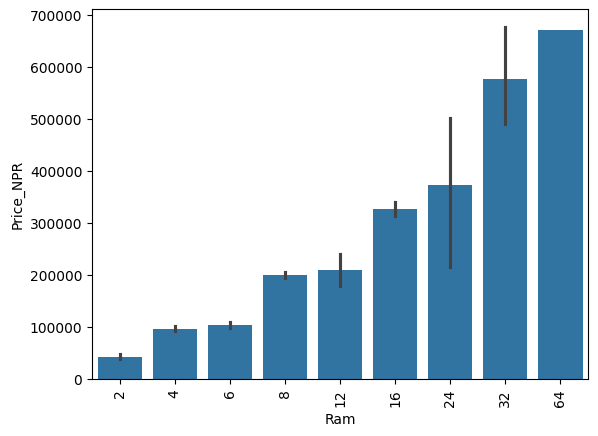

In [95]:
sns.barplot(x=df['Ram'], y=df['Price_NPR'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

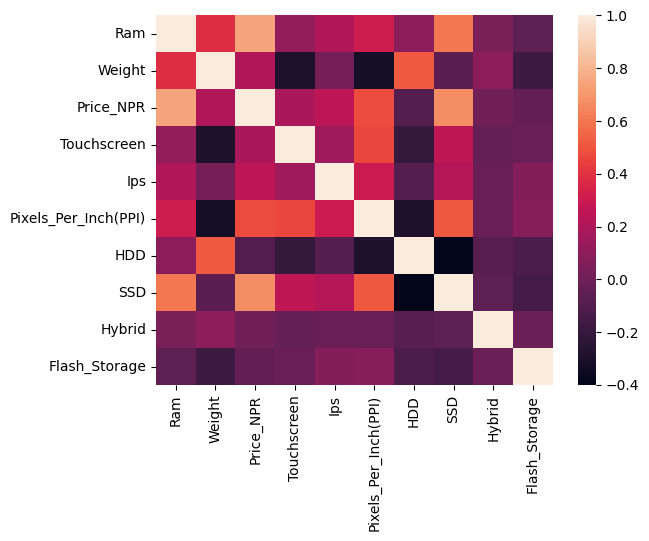

In [96]:
sns.heatmap(df.corr(numeric_only=True))

C:\Users\lamab\AppData\Local\Temp\ipykernel_24416\4020296647.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_NPR'])


<Axes: xlabel='Price_NPR', ylabel='Density'>

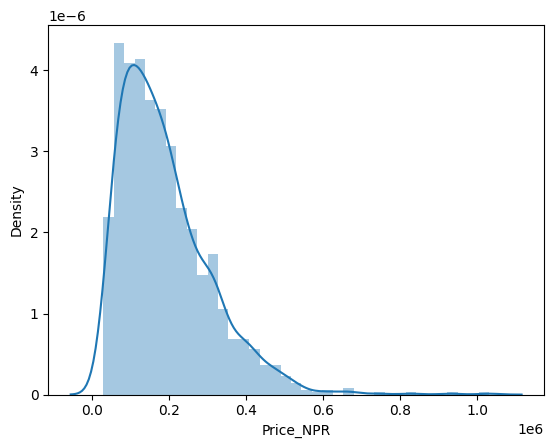

In [97]:
sns.distplot(df['Price_NPR'])

C:\Users\lamab\AppData\Local\Temp\ipykernel_24416\1293736784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price_NPR']))


<Axes: xlabel='Price_NPR', ylabel='Density'>

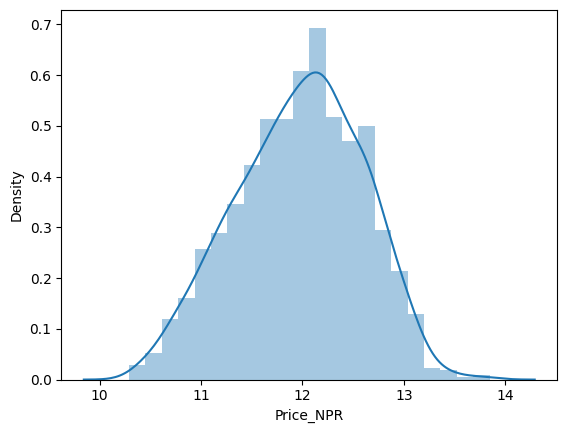

In [98]:
sns.distplot(np.log(df['Price_NPR']))

In [99]:
df.drop(columns='Product', inplace=True)

## FEATURE AND TARGET SELECTION

In [100]:
X = df.drop(['Price_NPR'], axis=1)
y = np.log(df['Price_NPR'])


In [101]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,0,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,0,64,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD,Windows


In [102]:
y

0       12.330211
1       11.931233
2       11.484387
3       12.968932
4       12.627557
          ...    
1298    11.588355
1299    12.442571
1300    10.563739
1301    11.768585
1302    11.040814
Name: Price_NPR, Length: 1302, dtype: float64

## TRAIN_TEST SPLIT TO DIVIDE THE DATA INTO TRAINING DATA AND TEST DATA

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [105]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
147,Asus,Notebook,4,2.00,0,0,141.211998,Other Intel Processor,1000,0,0,0,Intel,Windows
342,HP,Notebook,8,2.10,0,1,141.211998,Intel Core i3,1000,0,0,0,Nvidia,Windows
1003,HP,Notebook,4,1.64,0,0,111.935204,Intel Core i5,500,0,0,0,Intel,Windows
814,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,0,256,0,0,AMD,Windows
344,Dell,Ultrabook,8,1.20,0,0,165.632118,Intel Core i7,0,256,0,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,Intel Core i5,1000,256,0,0,Nvidia,Windows
1130,HP,Notebook,8,2.04,0,0,100.454670,Intel Core i7,2000,0,0,0,Intel,Windows
1295,Dell,Notebook,8,2.30,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD,Others/No OS/Linux
860,Lenovo,Notebook,8,2.30,0,1,141.211998,Intel Core i5,1000,0,0,0,Intel,Windows


In [106]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Pixels_Per_Inch(PPI),Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
478,Dell,Notebook,8,2.20,0,0,141.211998,Intel Core i5,1000,0,0,0,AMD,Windows
724,MSI,Gaming,8,2.70,0,0,127.335675,Intel Core i7,1000,128,0,0,Nvidia,Windows
312,MSI,Gaming,16,2.80,0,1,141.211998,Intel Core i7,1000,256,0,0,Nvidia,Windows
851,Asus,Gaming,16,2.10,0,0,141.211998,Intel Core i7,1000,128,0,0,Nvidia,Windows
1276,Dell,Notebook,6,2.30,0,0,100.454670,Intel Core i3,1000,0,0,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,HP,Notebook,8,2.50,0,0,127.335675,Intel Core i7,0,256,0,0,Nvidia,Windows
296,Acer,Notebook,8,2.50,0,0,141.211998,Intel Core i7,0,256,0,0,Nvidia,Others/No OS/Linux
286,Lenovo,Notebook,8,1.95,0,1,141.211998,Intel Core i7,0,256,0,0,Intel,Windows
997,Acer,Notebook,4,2.40,0,0,100.454670,Other Intel Processor,500,0,0,0,Intel,Windows


In [107]:
y_train

147     10.970659
342     11.703697
1003    11.788028
814     11.801809
344     12.494564
          ...    
1095    11.813378
1130    11.574148
1295    11.822088
860     11.876030
1126    11.301718
Name: Price_NPR, Length: 1041, dtype: float64

In [108]:
y_test

478     11.644730
724     12.336750
312     12.779233
851     12.679100
1276    11.259067
          ...    
199     12.081789
296     12.016549
286     12.130352
997     11.070188
10      11.106114
Name: Price_NPR, Length: 261, dtype: float64

## SEPERATING CATEGORICAL AND NUMERICAL FEATURES

In [109]:
categorical_cols = [
    'Company',
    'TypeName',
    'Cpu_brand',
    'Gpu_brand',
    'os'
]

numerical_cols = [
    col for col in X.columns if col not in categorical_cols
]


In [110]:
categorical_cols

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'os']

In [111]:
numerical_cols

['Ram',
 'Weight',
 'Touchscreen',
 'Ips',
 'Pixels_Per_Inch(PPI)',
 'HDD',
 'SSD',
 'Hybrid',
 'Flash_Storage']

## ENCODING CATEGORICAL FEATURES USING COLUMNTRANSFORMER

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)


In [113]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Company', 'TypeName', 'Cpu_brand',
                                  'Gpu_brand', 'os'])])

## Building Machine Learning Pipelines

To streamline preprocessing and model training:
- Pipelines are used to combine preprocessing and model steps
- This ensures that the same preprocessing is applied during both training and testing
- Pipelines reduce data leakage and improve code organization

Each regression model is trained using its own pipeline consisting of:
1. Data preprocessing
2. Model training


### Linear Regression Pipeline

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [115]:
lr_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu_brand',
                                                   'os'])])),
                ('model', LinearRegression())])

## Random Forest Pipeline

In [116]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


In [117]:
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu_brand',
                                                   'os'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

## XGBoost Pipeline

In [118]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])


In [119]:
xgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu_brand',
                                                   'os'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              ear...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

# MODEL TRAINING WITH METRICS EVALUATION AND COMPARISON

In [120]:
models = {
    'Linear Regression': lr_pipeline,
    'Random Forest': rf_pipeline,
    'XGBoost': xgb_pipeline
}

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [122]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
        'R2 Score': r2_score(y_test, preds)
    })

results_df = pd.DataFrame(results)

In [123]:
results

[{'Model': 'Linear Regression',
  'MAE': 0.21444258119510878,
  'RMSE': np.float64(0.27213704771638103),
  'R2 Score': 0.8077866862204068},
 {'Model': 'Random Forest',
  'MAE': 0.1652990374461281,
  'RMSE': np.float64(0.2176191127146775),
  'R2 Score': 0.8770857604745126},
 {'Model': 'XGBoost',
  'MAE': 0.15550542867171865,
  'RMSE': np.float64(0.20723881267607314),
  'R2 Score': 0.8885319717764798}]

## LINEAR REGRESSION MODEL

In [124]:
results[0]

{'Model': 'Linear Regression',
 'MAE': 0.21444258119510878,
 'RMSE': np.float64(0.27213704771638103),
 'R2 Score': 0.8077866862204068}

## RANDOM FOREST REGRESSSION 

In [125]:
results[1]

{'Model': 'Random Forest',
 'MAE': 0.1652990374461281,
 'RMSE': np.float64(0.2176191127146775),
 'R2 Score': 0.8770857604745126}

## XGBOOST REGRESSION

In [126]:
results[2]

{'Model': 'XGBoost',
 'MAE': 0.15550542867171865,
 'RMSE': np.float64(0.20723881267607314),
 'R2 Score': 0.8885319717764798}

# HYPERPARAMETER TUNING

In [127]:
from sklearn.model_selection import GridSearchCV

## LINEAR REGRESSION

In [144]:
lr_param_grid = {
    'model__fit_intercept': [True, False],
    'model__positive': [False, True]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)



In [129]:
lr_grid.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\lamab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'Cpu_brand',
                                                                          'Gpu_brand',
                                                                          'os'])])),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'model__fit_intercept': [True, False],
                         'model__positive': [False, True]},
             scoring='r2', verbose=2)

In [130]:
lr_grid.best_params_

{'model__fit_intercept': True, 'model__positive': False}

In [131]:
lr_grid.best_score_

np.float64(0.8174770438594645)

## RANDOM FOREST REGRESSOR

In [142]:
rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,
    n_jobs=-1
)

In [143]:
rf_grid.fit(X_train, y_train)

C:\Users\lamab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'Cpu_brand',
                                                                          'Gpu_brand',
                                                                          'os'])])),
                                       ('model',
                                        RandomForestRegressor(n_estimators=200,
                                                              n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
rf_grid.best_params_

In [135]:
rf_grid.best_score_

np.float64(0.8674531073758864)

## XGBOOST REGRESSOR

In [136]:
xgb_param_grid = {
    'model__n_estimators': [200, 300],
    'model__max_depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=5,
    n_jobs=-1
)

In [137]:
xgb_grid.fit(X_train, y_train)

C:\Users\lamab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'Cpu_brand',
                                                                          'Gpu_brand',
                                                                          'os'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsampl...
                                                     max_depth=6,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=300,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [4, 6],
                         'model__n_estimators': [200, 300],
                         'model__subsample': [0.8, 1.0]},
             scoring='r2')

In [138]:
xgb_grid.best_params_

{'model__colsample_bytree': 1.0,
 'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 300,
 'model__subsample': 0.8}

In [139]:
xgb_grid.best_score_

np.float64(0.8922220419292373)